In [1]:
%matplotlib inline

# mcnemar_tables: contingency tables for McNemar's test and Cochran's Q test

Function to compute a 2x2 contingency tables for McNemar's Test and Cochran's Q Test

> `from mlxtend.evaluate import mcnemar_tables`    

## Overview

###  contingency Tables

A 2x2 contingency table as being used in a McNemar's Test ([`mlxtend.evaluate.mcnemar`](mcnemar.md)) is a useful aid for comparing two different models. In contrast to a typical confusion matrix, this table compares two models to each other rather than showing the false positives, true positives, false negatives, and true negatives of a single model's predictions:

![](./mcnemar_table_files/mcnemar_contingency_table.png)

For instance, given that 2 models have a accuracy of with a 99.7% and 99.6% a 2x2 contingency table can provide further insights for model selection.


![](./mcnemar_table_files/mcnemar_contingency_table_ex1.png)

In both subfigure A and B, the predictive accuracies of the two models are as follows:

- model 1 accuracy: 9,960 / 10,000 = 99.6%
- model 2 accuracy: 9,970 / 10,000 = 99.7%

Now, in subfigure A, we can see that model 2 got 11 predictions right that model 1 got wrong. Vice versa, model 2 got 1 prediction right that model 2 got wrong. Thus, based on this 11:1 ratio, we may conclude that model 2 performs substantially better than model 1. However, in subfigure B, the ratio is 25:15, which is less conclusive about which model is the better one to choose.

### References

- McNemar, Quinn, 1947. "[Note on the sampling error of the difference between correlated proportions or percentages](http://link.springer.com/article/10.1007%2FBF02295996)". Psychometrika. 12 (2): 153–157.
- Edwards AL: Note on the “correction for continuity” in testing the significance of the difference between correlated proportions. Psychometrika. 1948, 13 (3): 185-187. 10.1007/BF02289261.
- https://en.wikipedia.org/wiki/McNemar%27s_test


## Example 1 - Single 2x2 contingency Table

In [2]:
import numpy as np
from mlxtend.evaluate import mcnemar_tables

y_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

y_mod0 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])
y_mod1 = np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

tb = mcnemar_tables(y_true, 
                    y_mod0, 
                    y_mod1)

tb

{'model_0 vs model_1': array([[ 4.,  1.],
        [ 2.,  3.]])}

To visualize (and better interpret) the contingency table via matplotlib, we can use the `checkerboard_plot` function:

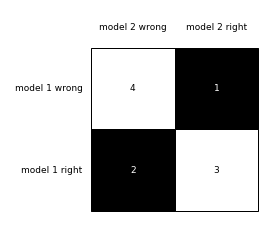

In [3]:
from mlxtend.plotting import checkerboard_plot
import matplotlib.pyplot as plt

brd = checkerboard_plot(tb['model_0 vs model_1'],
                        figsize=(3, 3),
                        fmt='%d',
                        col_labels=['model 2 wrong', 'model 2 right'],
                        row_labels=['model 1 wrong', 'model 1 right'])
plt.show()

## Example 2 - Multiple 2x2 contingency Tables

If more than two models are provided as input to the `mcnemar_tables` function, a 2x2 contingency table will be created for each pair of models:

In [4]:
import numpy as np
from mlxtend.evaluate import mcnemar_tables

y_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

y_mod0 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])
y_mod1 = np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])
y_mod2 = np.array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

tb = mcnemar_tables(y_true, 
                    y_mod0, 
                    y_mod1,
                    y_mod2)

for key, value in tb.items():
    print(key, '\n', value, '\n')

model_0 vs model_1 
 [[ 4.  1.]
 [ 2.  3.]] 

model_0 vs model_2 
 [[ 4.  2.]
 [ 2.  2.]] 

model_1 vs model_2 
 [[ 5.  1.]
 [ 0.  4.]] 



## API

In [1]:
with open('../../api_modules/mlxtend.evaluate/mcnemar_tables.md', 'r') as f:
    s = f.read() 
print(s)

## mcnemar_tables

*mcnemar_tables(y_target, *y_model_predictions)*

Compute multiple 2x2 contingency tables for McNemar's
test or Cochran's Q test.

**Parameters**

- `y_target` : array-like, shape=[n_samples]

    True class labels as 1D NumPy array.


- `y_model_predictions` : array-like, shape=[n_samples]

    Predicted class labels for a model.

**Returns**


- `tables` : dict

    Dictionary of NumPy arrays with shape=[2, 2]. Each dictionary
    key names the two models to be compared based on the order the
    models were passed as `*y_model_predictions`. The number of
    dictionary entries is equal to the number of pairwise combinations
    between the m models, i.e., "m choose 2."

    For example the following target array (containing the true labels)
    and 3 models

    - y_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
    - y_mod0 = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])
    - y_mod0 = np.array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0])
    - y_mod0 = np.array([0, 1, 1, 1, 0, 1